## Testing: &thinsp; featues of dataset

In [1]:
import xarray as xr
import numpy as np

import skimage.measure as skm
import matplotlib.pyplot as plt
import cartopy

import os
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None, fig_width=20 ,fig_height=10):
    projection = cartopy.crs.PlateCarree(central_longitude=180)
    lat = scene.lat
    lon = scene.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
    scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
    ax.set_title(title)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [3]:
def plot_timeseries(y, variable_name='', series_type ='', title='', xmin = None, ymin = None):
    plt.figure(figsize=(25,5))
    plt.plot(y)
    plt.axhline(y=y.mean(dim='time'), color='k')
    plt.title(title)
    plt.ylabel(variable_name)
    plt.xlabel(series_type)
    plt.ylim([xmin,ymin])

In [4]:
def calc_sMean(var):
    aWeights = np.cos(np.deg2rad(var.lat))
    return var.weighted(aWeights).mean(dim=('lat','lon'))

In [5]:
def save_file(dataset, folder, filename):
    os.makedirs(folder, exist_ok=True)
    path = folder + '/' + filename

    if os.path.exists(path):
        os.remove(path)    
    
    dataset.to_netcdf(path)

In [20]:
models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]

experiments =[
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = [
    'GPCP'
    ]
obs = observations[0]

variables = [
    # 'precip',
    'tas',
    # 'hus',
    # 'hur',
    # 'wap',
    # 'clouds',
    # 'pw',
    # 'wap500',
    # 'clMax',
    # 'rome',
    # 'numberIndex',
    # 'prPercentiles'
]
variable = variables[0]


# folder = home + '/Documents/data/obs/' + obs
# fileName =  obs + '_' + variable + '.nc'

folder = home + '/Documents/data/CMIP5/ds/' + model
fileName =  model + '_' + variable + '_'+ experiment+ '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (time: 10957, lat: 22, lon: 128)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
    height   float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes: (12/28)
    institution:            EC-Earth (European Earth System Model)
    institute_id:           ICHEC
    experiment_id:          historical
    source:                 EC-EARTH 2.3 (2011); atmosphere: IFS (cy31R1+modi...
    model_id:               EC-EARTH
    forcing:                Nat,Ant
    ...                     ...
    table_id:               Table day (26 July 2011) 0640f2bc62aad4ebefa8ecc1...
    title:                  EC-EARTH model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            6
    cmor_version:           2.8.0

In [15]:
ds.precip

<xarray.DataArray 'precip' (time: 10957, lat: 22, lon: 128)>
[30854912 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    mm day⁻¹

In [9]:
folder

'/Users/cbla0002/Documents/data/CMIP5/ds/EC-EARTH/EC-EARTH'

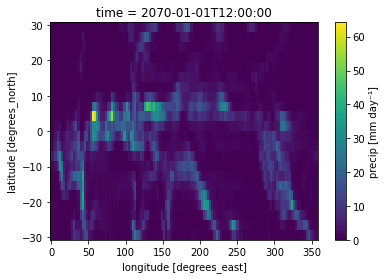

In [18]:
ds['precip'].isel(time=-0).plot()

In [15]:
# var = ds['precip']
# var

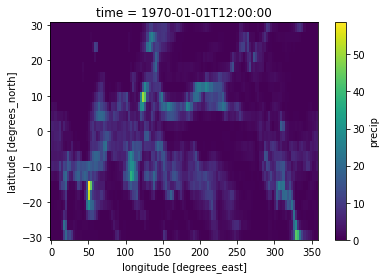

In [16]:
a = ds['precip']*60*60*24
a.isel(time=0).plot()

In [17]:
precip_n = ds['precip']*60*60*24 # convert to mm/day
precip_n.attrs['units']= 'mm day' + chr(0x207B) + chr(0x00B9)

ds_pr = xr.Dataset(
    data_vars = {'precip': precip_n},
    attrs = ds.attrs
    )

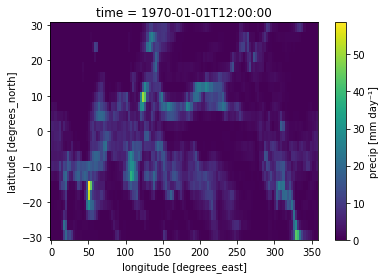

In [18]:
precip_n.isel(time=0).plot()

In [19]:
# folder_save = home + '/Documents/data/obs/' + obs
# fileName =  obs + '_' + variable + '.nc'


folder_save = home + '/Documents/data/cmip5/ds/' + model +'/' + model
fileName =  model + '_' + variable + '_' + experiment + '.nc'

# ds_n =  xr.Dataset(
#     data_vars ={'rome': var_n},
#     attrs = ds.attrs)


save_file(ds_pr, folder_save, fileName)